In [105]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
sns.set(color_codes=True)

%matplotlib inline

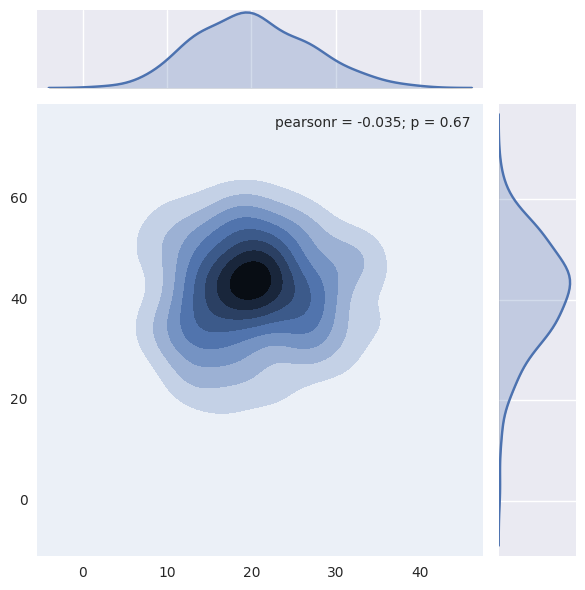

In [443]:
data1 = np.random.normal(20, 7, size=150)
data2 = np.random.normal(40, 10, size=150)
sns.jointplot(x=data1, y=data2,kind="kde");

[[-5.         -4.94974874 -4.89949749 ...,  4.89949749  4.94974874  5.        ]
 [-5.         -4.94974874 -4.89949749 ...,  4.89949749  4.94974874  5.        ]
 [-5.         -4.94974874 -4.89949749 ...,  4.89949749  4.94974874  5.        ]
 ..., 
 [-5.         -4.94974874 -4.89949749 ...,  4.89949749  4.94974874  5.        ]
 [-5.         -4.94974874 -4.89949749 ...,  4.89949749  4.94974874  5.        ]
 [-5.         -4.94974874 -4.89949749 ...,  4.89949749  4.94974874  5.        ]]


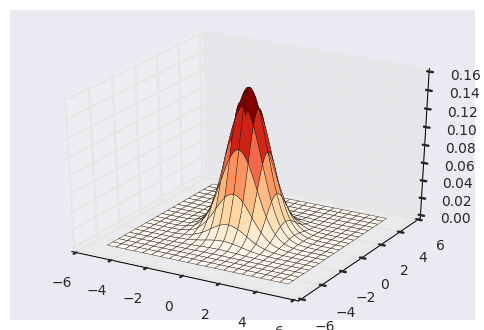

In [448]:
data1 = np.random.normal(20, 6, size=20)
data1 = np.sort(data1)
data2 = np.sort(data1) + 9.9

# data1 = np.linspace(-5, 5, 40)
# print(data1)
# data1 = np.sort(np.random.normal(20, 3, size=240))
# print(data1)
# data2 = data1
def dd(data1, data2):
    from matplotlib import pylab
    x = np.linspace(-5, 5, 200)
    y = x
    X, Y = np.meshgrid(x, y)
    
#     X, Y = np.meshgrid(data1, data2)
    Z = pylab.bivariate_normal(X, Y)
    print(X)
    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, Z, cmap= "OrRd")
dd(bins1, bins1)

In [449]:
# data = [4, 1, 4,5, 6, 4, 5, 2, 4, 5, 4, 4, 3, 3, 6,3,3,3, 4, 5, 3, 6, 4, 3, 4, 2, 5, 0,4, 3, 4, 5, 5, 3, 4, 5, 4, 3, 5, 6, 3, 4, 5, 5, 8, 7, 3, 5, 6, 4, 5]
def pre_calc(data):
    mean = np.sum(data) / len(data)
    variance = np.sum(np.power(np.subtract(data, mean), 2)) / len(data)
    sigma = np.sqrt(variance)
#     print("mean: ", mean, np.mean(data))
#     print("variance: ", variance, np.var(data))
#     print("standard deviation: ", sigma, np.std(data))
    return mean, variance, sigma

def cov(data1, data2):
    mean1, variance1, sigma1 = pre_calc(data1)
    mean2, variance2, sigma2 = pre_calc(data2)
    return np.sum((data1-mean1) * (data2-mean2)) / len(data1)

print(cov(data1, data2))
np.cov(data1, data2)

15.6858339625


array([[ 16.51140417,  16.51140417],
       [ 16.51140417,  16.51140417]])

In [450]:
def plot_raw_data(data, mean, sigma):
    mean, variance, sigma = pre_calc(data)
    # plotting data
    plt.ylim(-30, 70)
    plt.scatter(x=range(len(data1)), y=data)

    # plotting mean
    plt.plot(range(len(data)), [mean] * len(data), "r-")

    # plotting standard deviation
    plt.plot(range(len(data)), [sigma + mean] * len(data), "g-")
    plt.plot(range(len(data)), [mean - sigma] * len(data), "g-")

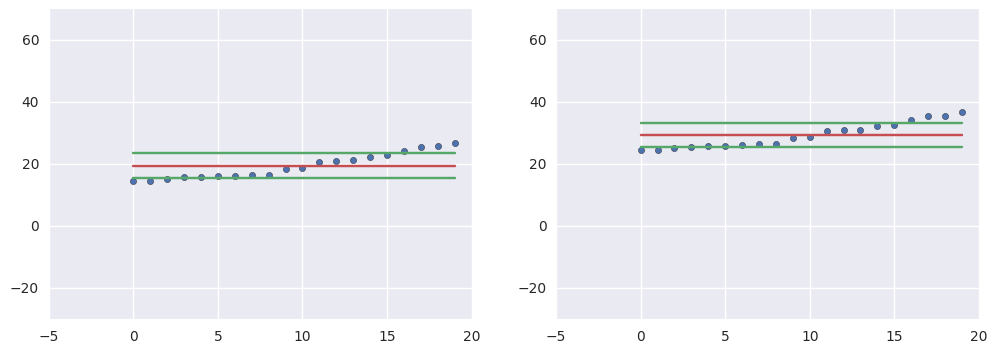

In [451]:
mean1, variance1, sigma1 = pre_calc(data1)
mean2, variance2, sigma2 = pre_calc(data2)

plt.figure(figsize=(12,4))
plt.subplot(121)
plot_raw_data(data1, mean1, sigma1)
plt.subplot(122)
plot_raw_data(data2, mean2, sigma2)

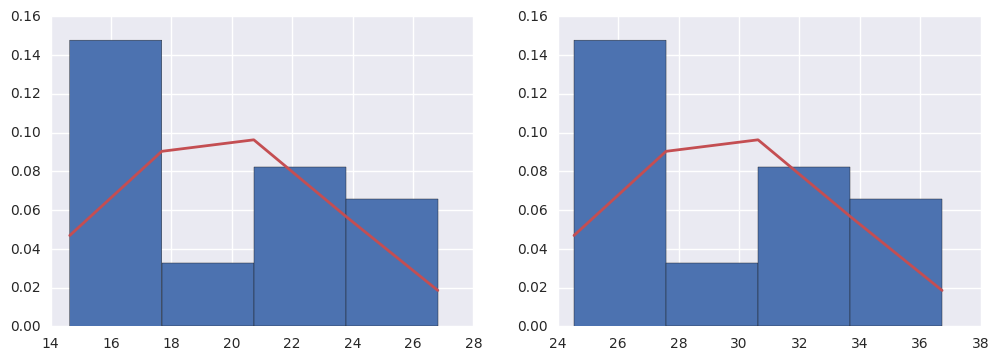

In [452]:
def plot_hist(data, mean, sigma):
    count, bins, ignored = plt.hist(data, len(data)//5, normed=True)
    plt.plot(
        bins, 
        1/(sigma*np.sqrt(2 * np.pi)) * np.exp(-(bins-mean)**2 / (2*sigma**2)), 
        linewidth=2,color="r")

plt.figure(figsize=(12,4))
plt.subplot(121)
plot_hist(data1, mean1, sigma1)
plt.subplot(122)
plot_hist(data2, mean2, sigma2)

In [453]:
mu, sigma = 10, 15.0 # mean and standard deviation
data = np.random.normal(mu, sigma, 1000)

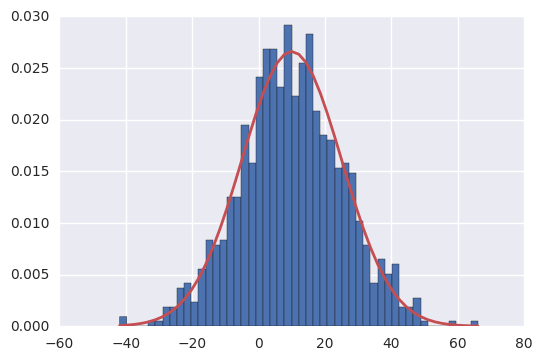

In [454]:
count, bins, ignored = plt.hist(data, 50, normed=True)
plt.plot(
    bins, 
    1/(sigma*np.sqrt(2 * np.pi)) * np.exp(-(bins-mu)**2 / (2*sigma**2)), 
    linewidth=2,color="r")

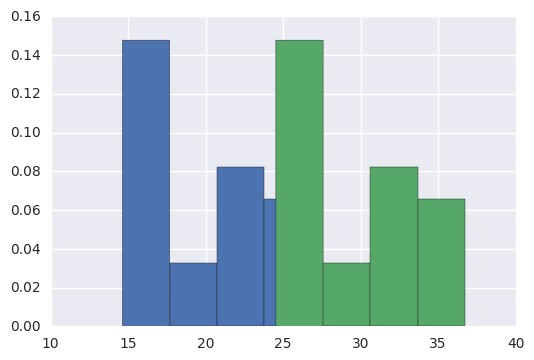

In [455]:
count1, bins1, ignored2 = plt.hist(data1, len(data1)//5, normed=True)
count1, bins2, ignored2 = plt.hist(data2, len(data2)//5, normed=True)

In [266]:
x = np.mat([7.0, 8]).T
m = np.mat([5, 5.0]).T
s = np.mat(np.diag((1,1.0)))
print(x)
print(m)
print(s)

[[ 7.]
 [ 8.]]
[[ 5.]
 [ 5.]]
[[ 1.  0.]
 [ 0.  1.]]


In [267]:
(x - m).T 

matrix([[ 2.,  3.]])

In [268]:
s.I

matrix([[ 1., -0.],
        [ 0.,  1.]])

In [269]:
(x - m).T  * s.I

matrix([[ 2.,  3.]])

In [270]:
(x - m).T  * s.I * (x - m)

matrix([[ 13.]])

In [317]:
s = np.mat(np.diag((1,1.0)))
s[0] = [1.0, 1]
s[1] = [0, 1.0]

print(s.I)
print(np.exp((x - m).T  * s.I * (x - m)))

[[ 1. -1.]
 [ 0.  1.]]
[[ 1096.63315843]]


[  1.   2.   2.   3.   3.   3.   4.   4.   4.   4.   5.   5.   5.   6.   6.
  17.]
[[ 11.62894737  12.30342105]
 [ 12.30342105  13.90134211]]


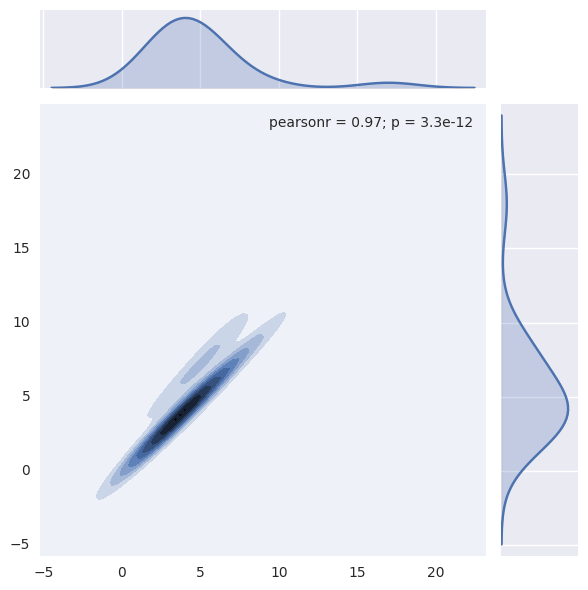

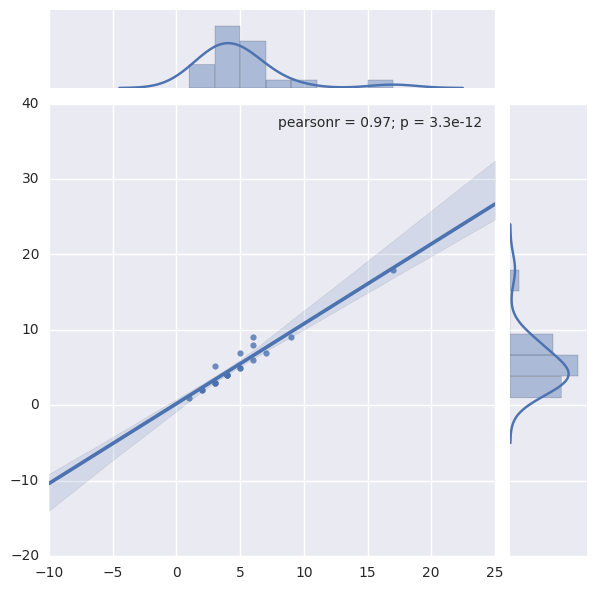

In [463]:
# x1 = np.array([1.0, 2, 2, 3, 3, 3, 3, 4, 5, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 8, 13, 14, 5, 16])
# x2 = np.array([1.0, 1, 2, 2, 3, 3, 2, 3, 2, 5, 4, 7, 4, 4, 4, 4, 5, 5, 5, 9, 11, 12, 5, 15])
xa = np.array([1.0, 2, 2, 3, 3, 3, 4,4,4,4,5,5,5,6,6,17, 9, 6, 7, 3])
xb = np.array([1.0, 2, 2.1, 3, 5.2, 3, 4,4,4,4,5,5,7,8,9,18, 9, 6, 7, 3]) 
print(x1)
sigma = np.cov(xa, xb)
print(sigma)
sns.jointplot(x=xa, y=xb, kind="kde")
sns.jointplot(x=xa, y=xb, kind="reg")

In [464]:
m_a = np.mean(xa)
m_b = np.mean(xb)
print(m_a, m_b)

4.95 5.465


In [465]:
x_b = 10
m2_a = m_a + sigma[0][1] * np.mat(sigma[1][1]).I * (x_b - m_b)
sigma2_a = sigma[0][0] - sigma[0][1] * np.mat(sigma[1][1]).I * sigma[1][0]
print(m2_a, sigma2_a)

[[ 8.96371422]] [[ 0.73977074]]


In [466]:
variance_a = np.power(sigma2_a, 2)
1/np.sqrt(2*np.pi * variance_a ) * np.exp(-1.0/2*variance_a )

matrix([[ 0.41018215]])

In [467]:
1/np.sqrt(2 * np.pi * sigma2_a) * np.exp(-1.0/2 * )

array([ 14.63474238,  14.67641919,  15.35474308,  15.79011584,
        15.85873345,  16.11074815,  16.37754846,  16.56903801,
        16.63364572,  18.45430307,  18.95437264,  20.82376473,
        21.01780929,  21.31088692,  22.50203282,  22.92548728,
        24.44158973,  25.63978791,  25.77092392,  26.82389715])